# Import the Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import requests
import urllib.parse

# Import the Datasets

In [3]:
df = pd.read_csv('/Users/kellylam/Glassdoor/Data/Glassdoor_clean_data.csv')
skills = pd.read_csv('/Users/kellylam/Glassdoor/Data/skill_count_output.csv')

In [4]:
df.head()

,Job Title,Company,Rating,Location,City,State,Salary Estimate,Min Salary (Thousands),Max Salary (Thousands),Average Salary (Thousands),Size,Industry,Job Description
0,Data Analyst,Bell Partners,NaN,"Raleigh, NC",Raleigh,NC,$40K - $73K (Glassdoor est.),40,73,56.5,1001 to 5000 Employees,Real Estate,Data Analyst\nCorporate Headquarters\n12575 Ul...
1,Data Analyst,Uline,3.6,"Pleasant Prairie, WI",Pleasant Prairie,WI,$65K - $79K (Employer est.),65,79,72.0,5001 to 10000 Employees,NaN,Data Analyst\nCorporate Headquarters\n12575 Ul...
2,Data Analyst (South of Milwaukee),Uline,3.6,"Milwaukee, WI",Milwaukee,WI,$65K - $79K (Employer est.),65,79,72.0,5001 to 10000 Employees,NaN,Data Analyst\nCorporate Headquarters\n12575 Ul...
3,Operations Data Analyst,Plante Moran,NaN,"Kalamazoo, MI",Kalamazoo,MI,$36K - $62K (Glassdoor est.),36,62,49.0,1001 to 5000 Employees,Accounting & Legal,Make your mark. With more than $17.2 billion o...
4,Data Analyst,Sperry Rail Inc.,2.7,"Olathe, KS",Olathe,KS,$40K - $69K (Glassdoor est.),40,69,54.5,201 to 500 Employees,Transportation & Logistics,"Data Analyst I: Based in Olathe, Ks. This is a..."


In [5]:
skills.head()

,Skill,Count
0,sql,448
1,regression,33
2,time series,11
3,statistics,213
4,computer science,222


# Job Listings

In [4]:
titles = df['Job Title'].unique()
titles

array(['Data Analyst', 'Data Analyst (South of Milwaukee)',
       'Operations Data Analyst', 'Tactical Data Link (TDL) Analyst-',
       'Data Standard Analyst - Biostatistics Team',
       'Data Warehouse Analyst', 'HR Systems & Data Analyst',
       'IS Data Analyst Intermediate', 'Business Analyst - Data Science',
       'Contract Data Analyst', 'Data Operations Analyst',
       'Lead Data Analyst', 'Regulatory Affairs Data Analyst',
       'Data Analyst (North of Chicago)',
       'Supply Chain Data Analyst (South of Milwaukee)',
       'Market Data Analyst', 'Data Science Analyst - RH',
       'Business Analyst - Claim and Data Analyst',
       'Senior Healthcare Data Analyst',
       'E-Commerce Marketing Data Analyst',
       'Quality Assurance Analyst - Data Warehouse ETL (South of Milwaukee)',
       'ERP Analyst, Data Conversion', 'Data Governance Analyst',
       'Data Analyst I', 'Business Data Analyst', 'USMTF Data Analyst',
       'ETL/ Data Warehouse Test Analyst',
    

### Seniority

Scrolling through the output, I see the following seniority levels:

Senior, Sr., Jr., Internship, Associate, Junior, Mid-Level, Manager

In this next function, we will categorize the job listings into seniority level.

In [5]:
def get_seniority(job_title):

    if 'sr' in job_title.lower() or 'sr.' in job_title.lower() or 'senior' in job_title.lower() or 'manager' in job_title.lower():
            return 'senior'
    elif 'jr.' in job_title.lower() or 'junior' in job_title.lower() or 'associate' in job_title.lower():
        return 'junior'
    elif 'internship'in job_title.lower() or 'intern' in job_title.lower():
        return 'intern'
    else:
        return 'mid-level'

In [6]:
df['Seniority'] = df['Job Title'].apply(get_seniority)
df['Seniority']

0      mid-level
1      mid-level
2      mid-level
3      mid-level
4      mid-level
         ...    
886    mid-level
887    mid-level
888    mid-level
889    mid-level
890       senior
Name: Seniority, Length: 891, dtype: object

In [7]:
df['Seniority'].value_counts()

mid-level    821
senior        61
junior         6
intern         3
Name: Seniority, dtype: int64

Being that we are still in a pandemic, it makes sense that more entry level positions would pop up less within job listings. It is a known fact that companies want to hire experienced individuals to reduce the amount of training and get hires into a rote working environment. 

### Salary By Seniority

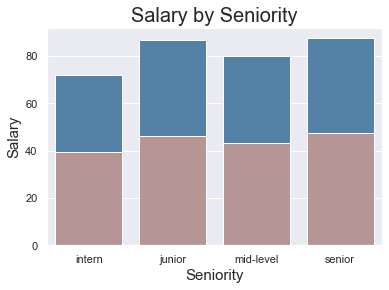

In [8]:
# Graphing the plot
sns.set_theme()

ax = sns.barplot(x='Seniority', y='Max Salary (Thousands)', data = df, order = ['intern', 'junior', 'mid-level', 'senior'], ci = None, color = 'steelblue') 
ax = sns.barplot(x='Seniority', y='Min Salary (Thousands)', data = df, order = ['intern', 'junior', 'mid-level', 'senior'], ci = None, color = 'rosybrown') 

plt.title('Salary by Seniority', fontsize = 20)
plt.xlabel('Seniority', fontsize = 15)
plt.ylabel('Salary', fontsize = 15)

plt.show()

In [9]:
df[df['Seniority'] == 'intern']

,Job Title,Company,Rating,Location,City,State,Salary Estimate,Min Salary (Thousands),Max Salary (Thousands),Average Salary (Thousands),Size,Industry,Job Description,Seniority
73,Master Data Analyst Internship,Casey's General Stores,3.2,"Ankeny, IA",Ankeny,IA,$46K - $85K (Glassdoor est.),46,85,65.5,10000+ Employees,Retail,"Casey's Store Support Center in Ankeny, IA is ...",intern
667,Data Analyst and Strategy - Summer Internship,Flagstar Bank,3.9,Michigan,NaN,MI,$44K - $80K (Glassdoor est.),44,80,62.0,1001 to 5000 Employees,Finance,The Information Technology Department at Flags...,intern
831,Data Analyst and Strategy - Summer Internship,Flagstar Bank,3.9,Michigan,NaN,MI,$28K - $51K (Glassdoor est.),28,51,39.5,1001 to 5000 Employees,Finance,The Information Technology Department at Flags...,intern


We see that junior data analysts get paid more than mid-level data analysts which is surprising without knowing the data. We know that there are only 6 positions whose mean will be more than mid-level positions who have 821 listings.

# Salary

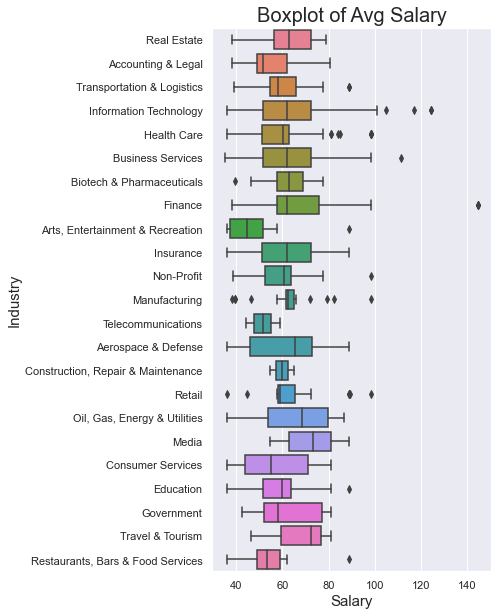

In [10]:
fig = plt.figure(figsize = (5,10))

sns.boxplot(x = 'Average Salary (Thousands)', y = 'Industry', data = df, palette = 'husl')

plt.title("Boxplot of Avg Salary", fontsize = 20)
plt.xlabel('Salary', fontsize = 15)
plt.ylabel('Industry', fontsize = 15)

plt.show()

### Top paying Industry

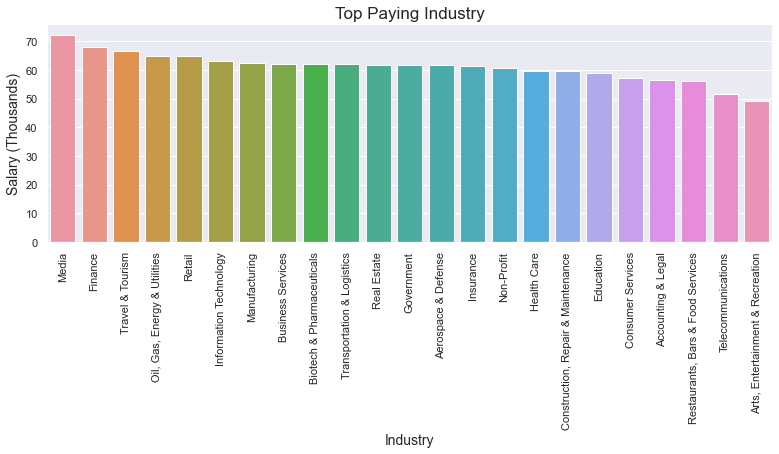

In [39]:
fig = plt.figure(figsize = (13, 4))

plot_order = df.groupby(['Industry'])['Average Salary (Thousands)'].mean().sort_values(ascending = False).index.values
ax = sns.barplot(x = 'Industry', y = 'Average Salary (Thousands)', data = df, order = plot_order, ci = None)

plt.xticks(rotation=90)
plt.title("Top Paying Industry", fontsize = 17)
plt.xlabel('Industry', fontsize = 14)
plt.ylabel('Salary (Thousands)', fontsize = 14)

plt.show()

Though media is at the forefront as a top paying industry, once again, there are only 8 companies which are in that industry; Same with travel & tourism.

In [13]:
df['Industry'].value_counts()

Business Services                     187
Information Technology                177
Health Care                            70
Finance                                62
Insurance                              48
Manufacturing                          24
Education                              24
Retail                                 21
Biotech & Pharmaceuticals              21
Aerospace & Defense                    20
Non-Profit                             16
Transportation & Logistics             16
Government                             11
Accounting & Legal                      9
Restaurants, Bars & Food Services       8
Media                                   8
Arts, Entertainment & Recreation        8
Consumer Services                       8
Real Estate                             5
Oil, Gas, Energy & Utilities            4
Travel & Tourism                        3
Construction, Repair & Maintenance      2
Telecommunications                      2
Name: Industry, dtype: int64

### Top Paying Companies

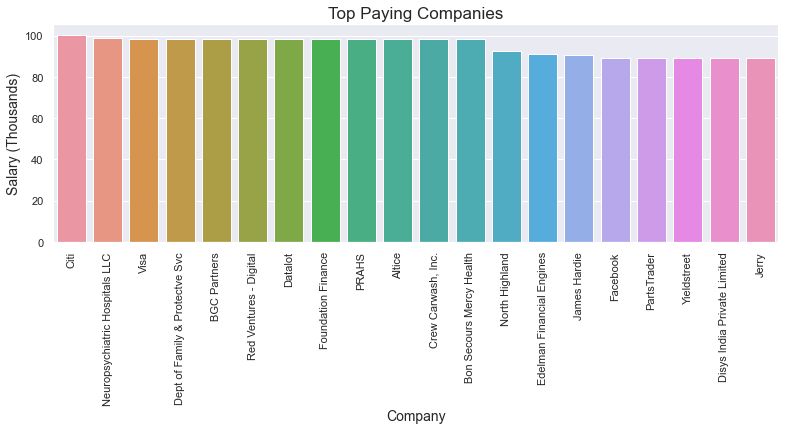

In [40]:
fig = plt.figure(figsize = (13, 4))

plot_order = df.groupby(['Company'])['Average Salary (Thousands)'].mean().sort_values(ascending = False).index.values[:20]
ax = sns.barplot(x = 'Company', y = 'Average Salary (Thousands)', data = df, order = plot_order, ci = None)

plt.xticks(rotation=90)
plt.title("Top Paying Companies", fontsize = 17)
plt.xlabel('Company', fontsize = 14)
plt.ylabel('Salary (Thousands)', fontsize = 14)

plt.show()

### Distribution

Mean value for Min Salary: 43.64870931537598
Mean value for Max Salary: 80.6026936026936


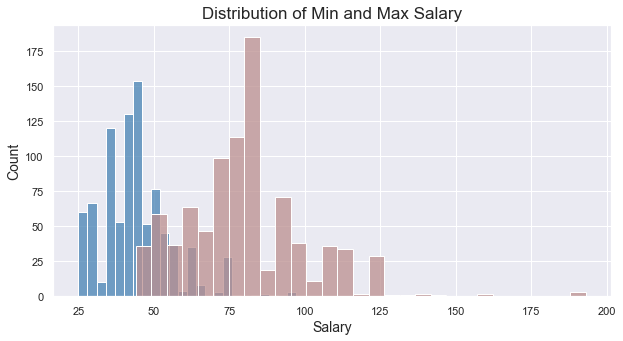

In [41]:
print("Mean value for Min Salary:", df['Min Salary (Thousands)'].mean())
print("Mean value for Max Salary:", df['Max Salary (Thousands)'].mean())

fig = plt.figure(figsize = (10,5))

sns.histplot(data = df, x = 'Min Salary (Thousands)', color = 'steelblue')
sns.histplot(data = df, x = 'Max Salary (Thousands)', color = 'rosybrown')

plt.title("Distribution of Min and Max Salary", fontsize = 17)
plt.xlabel('Salary', fontsize = 14)
plt.ylabel('Count', fontsize = 14)

plt.show()

Mean value for Avg Salary: 62.125701459034794


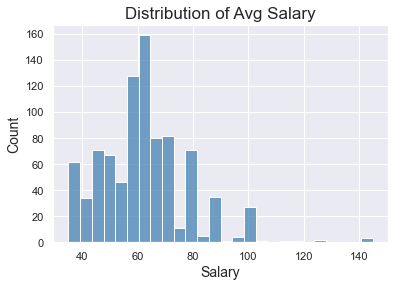

In [42]:
print("Mean value for Avg Salary:", df['Average Salary (Thousands)'].mean())

sns.histplot(data = df, x = 'Average Salary (Thousands)', color = 'steelblue')

plt.title("Distribution of Avg Salary", fontsize = 17)
plt.xlabel('Salary', fontsize = 14)
plt.ylabel('Count', fontsize = 14)

plt.show()

### Salary by City

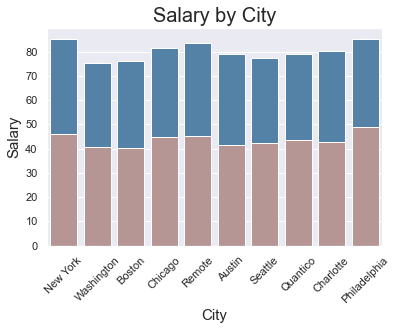

In [43]:
# Graphing the plot
ax = sns.barplot(x='City', y='Max Salary (Thousands)', data = df, order = df.City.value_counts().iloc[:10].index, ci = None, color = 'steelblue') 
ax = sns.barplot(x='City', y='Min Salary (Thousands)', data = df, order = df.City.value_counts().iloc[:10].index, ci = None, color = 'rosybrown') 

plt.xticks(rotation=45)
plt.title('Salary by City', fontsize = 20)
plt.xlabel('City', fontsize = 15)
plt.ylabel('Salary', fontsize = 15)

plt.show()

### Salary by State

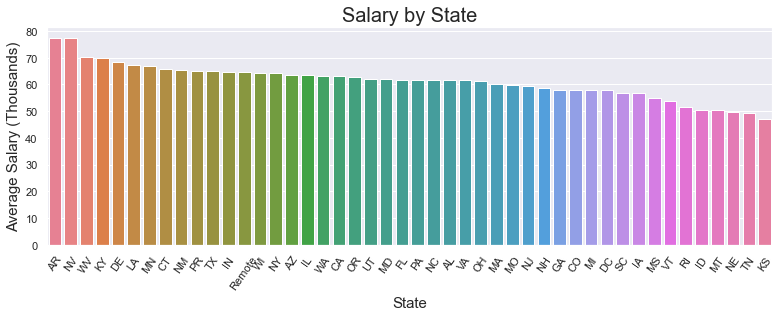

In [44]:
fig = plt.figure(figsize=(13,4))

plot_order = df.groupby(['State'])['Average Salary (Thousands)'].mean().sort_values(ascending = False).index.values
ax = sns.barplot(x='State', y='Average Salary (Thousands)', data = df, order = plot_order, ci = None, palette = 'husl') 

plt.xticks(rotation=55)
plt.title('Salary by State', fontsize = 20)
plt.xlabel('State', fontsize = 15)
plt.ylabel('Average Salary (Thousands)', fontsize = 15)

plt.show()

# Location

### State

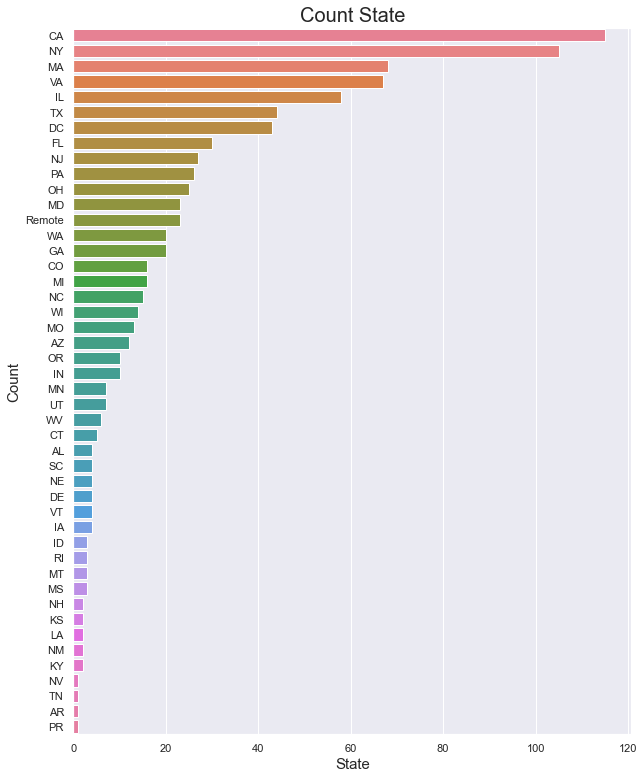

In [45]:
# Adjusting size of plot
plt.figure(figsize=(10,13))

# Graphing the plot
ax = sns.countplot(y = 'State', data = df, order = df.State.value_counts().index, palette = 'husl')
plt.title('Count State', fontsize = 20)
plt.xlabel('State', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.show()

### City

In [108]:
df['City'].nunique()

279

In [438]:
df['City'].value_counts()

New York              78
Washington            43
Boston                36
Chicago               28
Remote                23
                      ..
Orlando                1
Ankeny                 1
Carson                 1
Whitehouse Station     1
Franklin               1
Name: City, Length: 279, dtype: int64

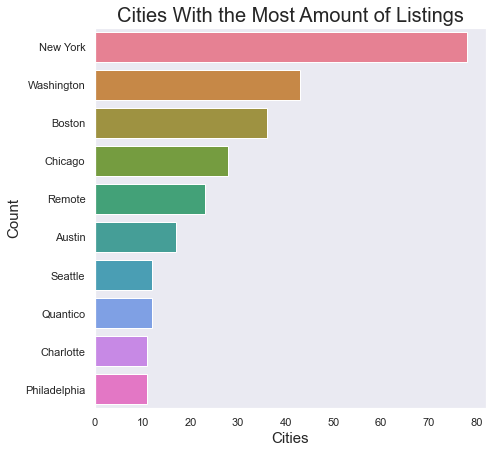

In [46]:
# Adjusting size of plot
plt.figure(figsize=(7,7))
sns.set_style("dark")

# Graphing the plot
ax = sns.countplot(y = 'City', data = df, order = df.City.value_counts().iloc[:10].index, palette = 'husl')
plt.title('Cities With the Most Amount of Listings', fontsize = 20)
plt.xlabel('Cities', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.show()

In [17]:
location = []
longitude = []
latitude = []
for address in df['Location'].unique():
    url = 'https://nominatim.openstreetmap.org/search/' + urllib.parse.quote(address) +'?format=json'
    response = requests.get(url).json()
    location.append(address)
    latitude.append(response[0]["lat"])
    longitude.append(response[0]["lon"])

In [18]:
df_1 = pd.DataFrame(list(zip(location, latitude, longitude)), columns = ['Location', 'Latitude', 'Longitude'])
df_1

,Location,Latitude,Longitude
0,"Raleigh, NC",35.7803977,-78.6390989
1,"Pleasant Prairie, WI",42.5269718,-87.8544568
2,"Milwaukee, WI",43.0349931,-87.922497
3,"Kalamazoo, MI",42.291707,-85.5872286
4,"Olathe, KS",38.8838856,-94.81887
...,...,...,...
285,"Tallahassee, FL",30.4380832,-84.2809332
286,Georgia,32.3293809,-83.1137366
287,"Bonita Springs, FL",26.339806,-81.7786972
288,"Franklin, IN",-34.604933,-58.431715


In [19]:
df = df.merge(df_1, how = 'left', on = 'Location')

In [21]:
fig = px.scatter_geo(df, lat = 'Latitude', lon = 'Longitude', color = 'Location', locationmode = 'USA-states', 
                     scope = 'usa', width = 1000, height = 700)

fig.update_layout(title = 'Data Analyst Job Listings By Location <br>(Hover for airport names)')

fig.show()

# Company

### Number of Unique Companies

In [386]:
num_uniq_companies = df['Company'].nunique()
num_uniq_companies # out of 891

532

### Companies With the Most Listings

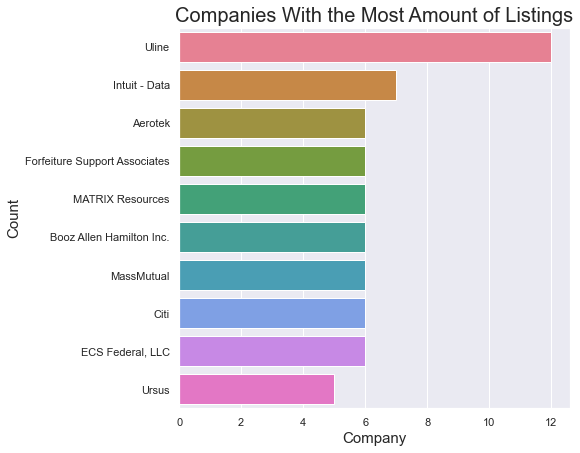

In [387]:
# Adjusting size of plot
plt.figure(figsize=(7,7))
sns.set_theme()

# Graphing the plot
ax = sns.countplot(y = 'Company', data = df, order = df.Company.value_counts().iloc[:10].index, palette = 'husl')
plt.title('Companies With the Most Amount of Listings', fontsize = 20)
plt.xlabel('Company', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.show()

# Rating

In [141]:
df['Rating'].unique()

array([nan, 3.6, 2.7, 4.4, 4. , 3. , 2.9, 2.3, 3.3, 3.7, 3.4, 4.1, 3.8,
       3.5, 3.9, 4.5, 5. , 2.8, 4.9, 3.2, 4.3, 2.4, 4.2, 4.8, 2.6, 4.7,
       4.6, 3.1, 2.2, 2.5, 1.9])

Mean value for Rating: 3.80110565110565


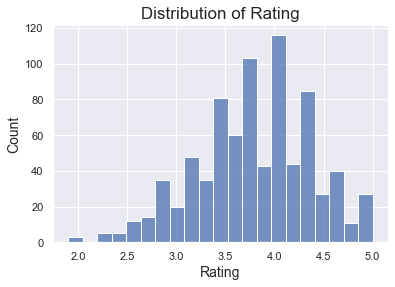

In [193]:
print("Mean value for Rating:", df['Rating'].mean())

sns.histplot(data = df, x = 'Rating', palette = 'steelblue')
plt.title("Distribution of Rating", fontsize = 17)
plt.xlabel('Rating', fontsize = 14)
plt.ylabel('Count', fontsize = 14)

plt.show()

# Size

In [144]:
df['Size'].unique()

array(['1001 to 5000 Employees', '5001 to 10000 Employees',
       '201 to 500 Employees', '501 to 1000 Employees',
       '51 to 200 Employees', '10000+ Employees', 'Unknown', nan,
       '1 to 50 Employees'], dtype=object)

In [153]:
df['Size'].replace(np.nan, 'Unknown', inplace = True)

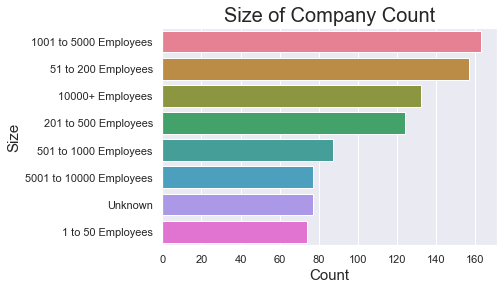

In [178]:
# Graphing the plot
ax = sns.countplot(y = 'Size', data = df, order = df.Size.value_counts().index, palette = 'husl')
plt.title('Size of Company Count', fontsize = 20)
plt.xlabel('Count', fontsize = 15)
plt.ylabel('Size', fontsize = 15)
 
plt.show()

# Industry

In [179]:
df['Industry'].unique()

array(['Real Estate', nan, 'Accounting & Legal',
       'Transportation & Logistics', 'Information Technology',
       'Health Care', 'Business Services', 'Biotech & Pharmaceuticals',
       'Finance', 'Arts, Entertainment & Recreation', 'Insurance',
       'Non-Profit', 'Manufacturing', 'Telecommunications',
       'Aerospace & Defense', 'Construction, Repair & Maintenance',
       'Retail', 'Oil, Gas, Energy & Utilities', 'Media',
       'Consumer Services', 'Education', 'Government', 'Travel & Tourism',
       'Restaurants, Bars & Food Services'], dtype=object)

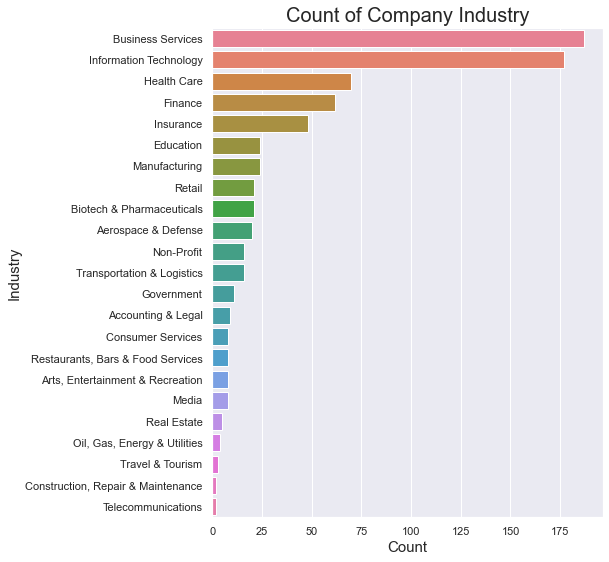

In [181]:
plt.figure(figsize=(7,9))

ax = sns.countplot(y = 'Industry', data = df, order = df.Industry.value_counts().index, palette = 'husl')
plt.title('Count of Company Industry', fontsize = 20)
plt.xlabel('Count', fontsize = 15)
plt.ylabel('Industry', fontsize = 15)
 
plt.show()

# Correlation Between Salary and Rating

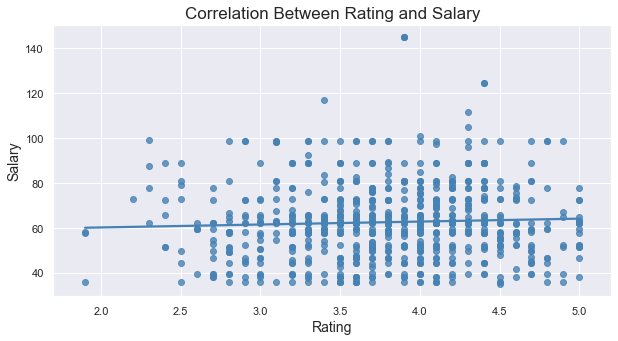

In [282]:
fig = plt.figure(figsize = (10, 5))

ax = sns.regplot(x = 'Rating', y = 'Average Salary (Thousands)', data = df, ci = None, color = 'steelblue')
ax.set_xlim(1.7, 5.2)
plt.title("Correlation Between Rating and Salary", fontsize = 17)
plt.xlabel('Rating', fontsize = 14)
plt.ylabel('Salary', fontsize = 14)

plt.show()

Turns out there is little to no correlation between salary and company rating.

# Skills

In [61]:
skills = skills.sort_values('Count', ascending = False)

In [62]:
skills

,Skill,Count
0,sql,448
1,communication,357
2,excel,326
3,data analysis,271
4,tableau,223
...,...,...
92,mongodb,1
93,logistic regression,1
94,naive bayes,1
95,svm,1


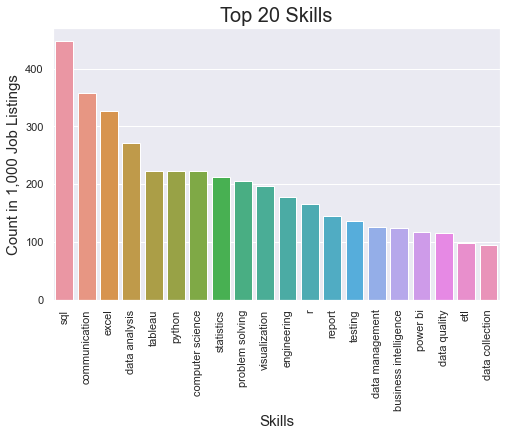

In [65]:
fig = plt.figure(figsize=(8,5))

ax = sns.barplot(x = skills.Skill.values[:20], y = skills.Count.values[:20])

plt.xticks(rotation=90)
plt.title('Top 20 Skills', fontsize = 20)
plt.xlabel('Skills', fontsize = 15)
plt.ylabel('Count in 1,000 Job Listings', fontsize = 15)

plt.show()

In terms of technical skills we have SQL, Excel, Tableau, R, and Power BI in our top 20 needed skills. 

There's also other broader skills such as data analysis, problem solving, visualization, reprtoing, testing, data management, data quality, etl, and data collection.

We have one soft skill that is important which is communication which most likely has subcategories of written and oral.

We also have what seems to be Bachelor's degrees in the major of Computer Science, Statistics, Engineering, and Business Intelligence.